In [2]:
###### algunas cosas cambian si pongo como comentarios en el import de geoviews y hvplot (liberias conflictivas?)

import logging
import os

import pypsa
import yaml
import pandas as pd
import geopandas as gpd
#import geoviews as gv
#import hvplot.pandas 
import numpy as np
import scipy as sp
import networkx as nx

# plotting stuff
import matplotlib.pyplot as plt

plt.style.use("bmh")
import seaborn as sns  ###
import cartopy.crs as ccrs

sns.set(style="darkgrid")

from scipy.sparse import csgraph
from itertools import product

from shapely.geometry import Point, LineString
import shapely, shapely.prepared, shapely.wkt

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

import sys

sys.path.append("../")  # to import helpers
from scripts._helpers import sets_path_to_root

sets_path_to_root("pypsa-earth")

max_node_size = 1.0  # maximum size of a node for plotting purposes [used in plots]

This is the repository path:  /Users/adelehannotte/Pypsa-earth/pypsa-earth
Had to go 1 folder(s) up.


In [3]:
# utility function for nice plotting


def normalize_node_size(values, max_node_size=max_node_size):
    return values / values.max() * max_node_size

In [4]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

## 37 buses clustering with augmented_line_connection

INFO:pypsa.io:Imported network elec_s_37_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


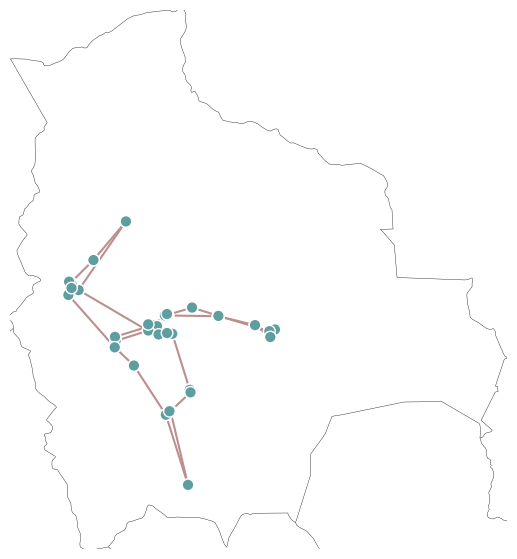

In [7]:
solved_37_network = os.getcwd() +  "/results/networks/elec_s_37_ec_lcopt_Co2L-3H.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_solve_37 = pypsa.Network(solved_37_network)

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n_solve_37.plot(ax=ax)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


In [6]:
n_solve_37.objective

356291858.4602345

## 37 buses clustering without augmented_line_connection

INFO:pypsa.io:Imported network elec_s_37_ec_lcopt_Co2L-3H_noline.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


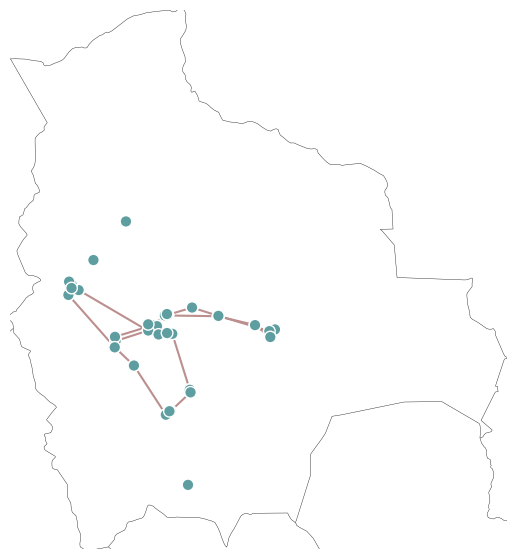

In [36]:
solved_37_network_noline = os.getcwd() +  "/results/networks/results_old/elec_s_37_ec_lcopt_Co2L-3H_noline.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_solve_37_noline = pypsa.Network(solved_37_network_noline)

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n_solve_37_noline.plot(ax=ax)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


In [8]:
n_solve_37_noline.objective

527934134.75189954



## Base network

In [9]:
base_network= os.getcwd() +  "/networks/base.nc"

n_base= pypsa.Network(base_network)

INFO:pypsa.io:Imported network base.nc has buses, lines, transformers


## Comparison with actual network

/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


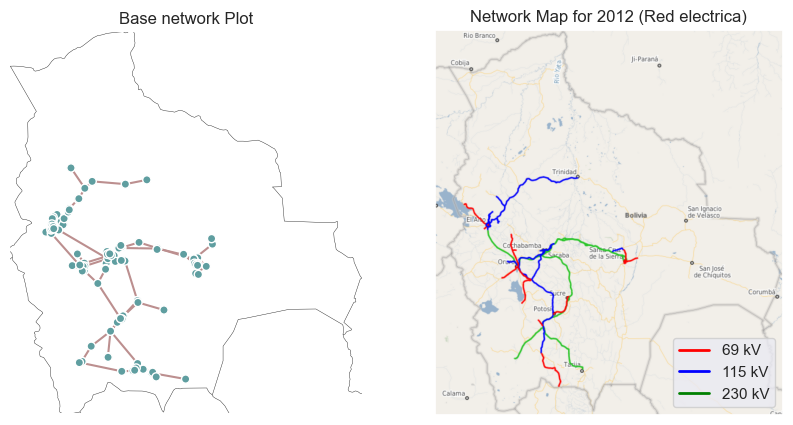

In [41]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_base.plot(ax=ax1)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
img = plt.imread(os.getcwd() +  "/post_process/network_maps/Red_2012.png")
extent = (0, img.shape[1]*0.1, 0, img.shape[0]*0.1) # left, right, bottom, top
ax2.imshow(img, extent=extent)
legend_colors = ['red', 'blue', 'green']
legend_labels = ['69 kV', '115 kV', '230 kV']
legend_handles = [plt.Line2D([0], [0], color=c, lw=2) for c in legend_colors]
ax2.legend(legend_handles, legend_labels, loc='lower right')

# optionally, add titles to your subplots
ax1.set_title('Base network Plot')
ax2.set_title('Network Map for 2012 (Red electrica)')

# show the subplots
plt.savefig('base_actual_comparison.png')
plt.show()


en tres categorías de distinto color rojo 69, azul 115 y verde 230 en KV

INFO:pypsa.io:Imported network elec_s_32_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


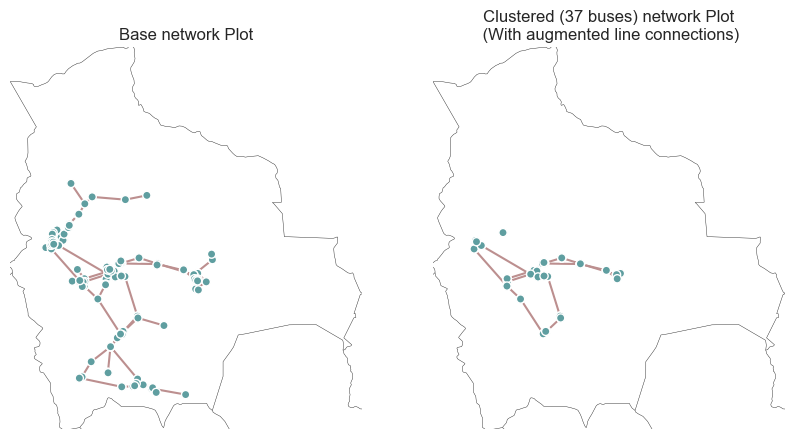

In [39]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

solved_32_network = os.getcwd() +  "/results/networks/elec_s_32_ec_lcopt_Co2L-3H.nc"
n_solve_32 = pypsa.Network(solved_32_network)

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solve_32.plot(ax=ax2,margin=0.5)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_base.plot(ax=ax1)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


# optionally, add titles to your subplots
ax2.set_title('Clustered (37 buses) network Plot\n (With augmented line connections)')
ax1.set_title('Base network Plot')


# show the subplots
plt.savefig('base_clustered_comparison.png')
plt.show()

INFO:pypsa.io:Imported network elec_s_32_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


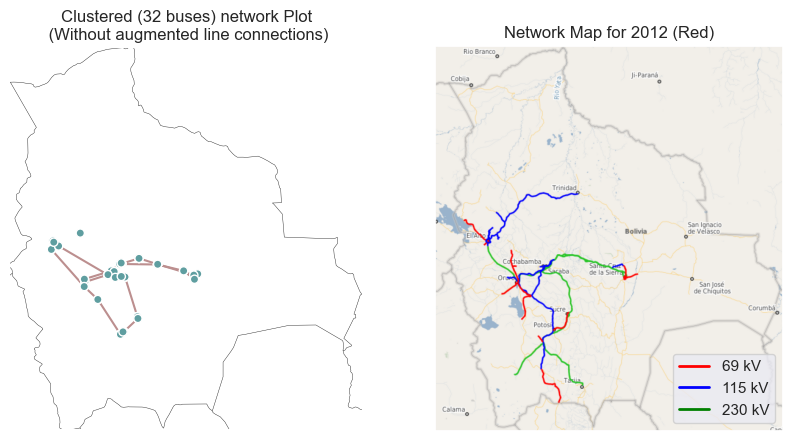

In [40]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

solved_32_network = os.getcwd() +  "/results/networks/elec_s_32_ec_lcopt_Co2L-3H.nc"
n_solve_32 = pypsa.Network(solved_32_network)

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solve_32.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
img = plt.imread(os.getcwd() +  "/post_process/network_maps/Red_2012.png")
extent = (0, img.shape[1]*0.1, 0, img.shape[0]*0.1) # left, right, bottom, top
ax2.imshow(img, extent=extent)
legend_colors = ['red', 'blue', 'green']
legend_labels = ['69 kV', '115 kV', '230 kV']
legend_handles = [plt.Line2D([0], [0], color=c, lw=2) for c in legend_colors]
ax2.legend(legend_handles, legend_labels, loc='lower right')

# optionally, add titles to your subplots
ax1.set_title('Clustered (32 buses) network Plot\n (Without augmented line connections)')
ax2.set_title('Network Map for 2012 (Red)')

# show the subplots
plt.savefig('clustered_actual_comparison.png')
plt.show()

## Comparison of the clustering with or withoutaugmented lines

/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


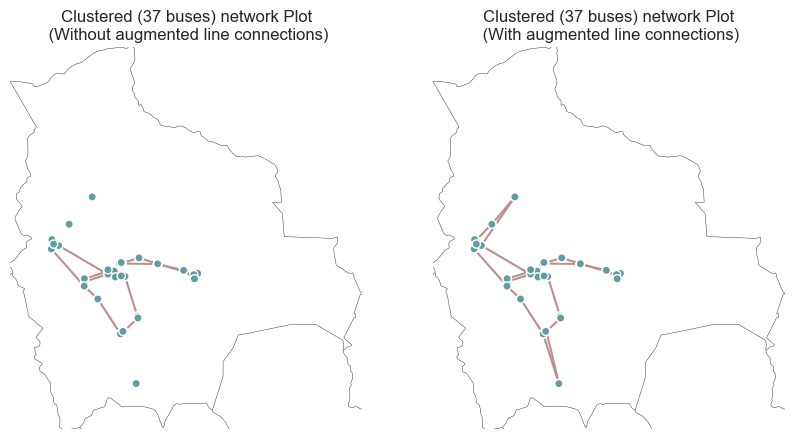

In [14]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solve_37_noline.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_solve_37.plot(ax=ax2,margin=0.5)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# optionally, add titles to your subplots
ax2.set_title('Clustered (37 buses) network Plot\n (With augmented line connections)')
ax1.set_title('Clustered (37 buses) network Plot\n (Without augmented line connections)')

# show the subplots
plt.savefig('augmentedLine_comparison.png')
plt.show()

/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


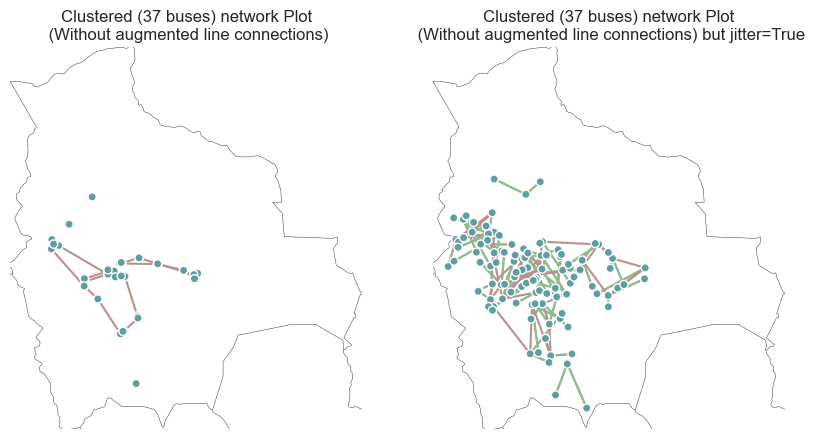

In [16]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solve_37_noline.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_solve_37_noline.plot(ax=ax2,margin=0.5,jitter=True,)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# optionally, add titles to your subplots
ax2.set_title('Clustered (37 buses) network Plot\n (Without augmented line connections) but jitter=True')
ax1.set_title('Clustered (37 buses) network Plot\n (Without augmented line connections)')

# show the subplots
plt.savefig('augmentedLine_comparison.png')
plt.show()

## Check the objective function

In [13]:
cluster_network = os.getcwd() +  "/networks/elec_s_37.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_cluster = pypsa.Network(cluster_network)

n_cluster

INFO:pypsa.io:Imported network elec_s_37.nc has buses, carriers, generators, lines, loads, storage_units


PyPSA Network
Components:
 - Bus: 37
 - Carrier: 13
 - Generator: 85
 - Line: 49
 - Load: 37
 - StorageUnit: 2
Snapshots: 8760

In [14]:
cluster_ec_network = os.getcwd() +  "/networks/elec_s_37_ec.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_cluster_ec = pypsa.Network(cluster_ec_network)

n_cluster_ec

INFO:pypsa.io:Imported network elec_s_37_ec.nc has buses, carriers, generators, lines, links, loads, storage_units, stores


PyPSA Network
Components:
 - Bus: 111
 - Carrier: 15
 - Generator: 85
 - Line: 49
 - Link: 148
 - Load: 37
 - StorageUnit: 2
 - Store: 74
Snapshots: 8760

In [15]:
opt_network = os.getcwd() +  "/networks/elec_s_37_ec_lcopt_Co2L-3H.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_opt = pypsa.Network(opt_network)

n_opt

INFO:pypsa.io:Imported network elec_s_37_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


PyPSA Network
Components:
 - Bus: 111
 - Carrier: 15
 - Generator: 85
 - GlobalConstraint: 1
 - Line: 49
 - Link: 148
 - Load: 37
 - StorageUnit: 2
 - Store: 74
Snapshots: 2920

/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


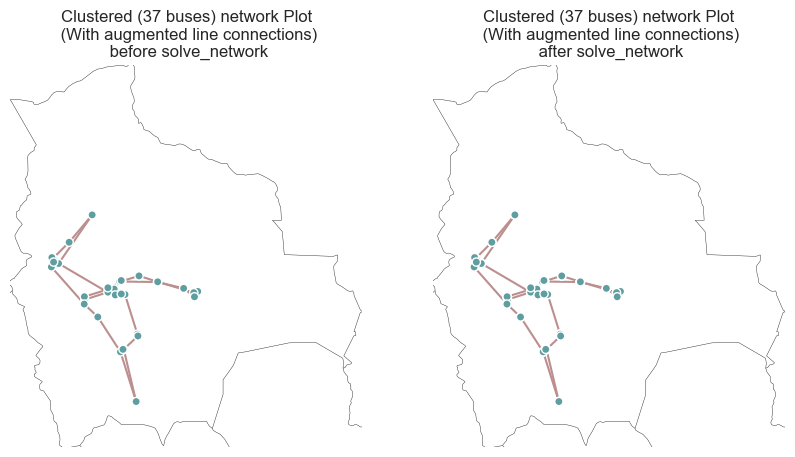

In [16]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_cluster.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_solve_37.plot(ax=ax2,margin=0.5)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# optionally, add titles to your subplots
ax1.set_title('Clustered (37 buses) network Plot\n (With augmented line connections)\n before solve_network')

ax2.set_title('Clustered (37 buses) network Plot\n (With augmented line connections)\n after solve_network')

# show the subplots
plt.savefig('effectofsolving_comparison.png')
plt.show()

# Bus isolated by the clustering process

Find out at which number of bus the clustering process isolate buses

Augmented lines

In [10]:
solved_5_network = os.getcwd() +  "/results/networks/elec_s_5_ec_lcopt_Co2L-3H.nc"
#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_solve_5 = pypsa.Network(solved_5_network)

n_solve_5.objective

INFO:pypsa.io:Imported network elec_s_5_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


367049142.70893246

No augmented lines

In [11]:
solved_5_network = os.getcwd() +  "/results/networks/elec_s_5_ec_lcopt_Co2L-3H_noline.nc"
#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_solve_5_noline = pypsa.Network(solved_5_network)

n_solve_5_noline.objective

INFO:pypsa.io:Imported network elec_s_5_ec_lcopt_Co2L-3H_noline.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


472797022.83657545

/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


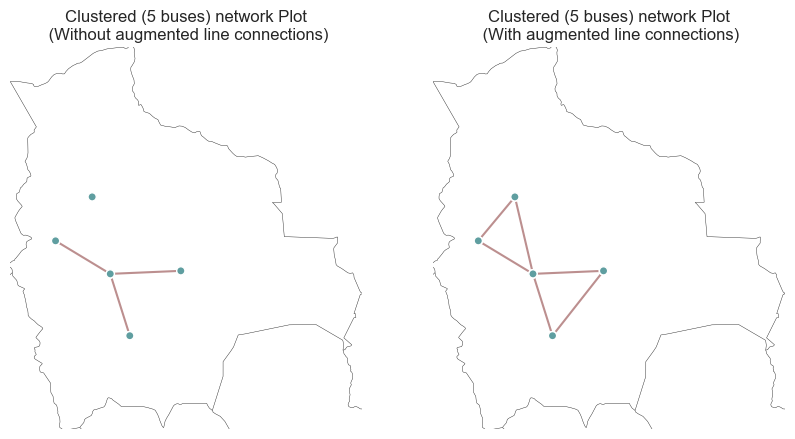

In [19]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solve_5_noline.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_solve_5.plot(ax=ax2,margin=0.5)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# optionally, add titles to your subplots
ax2.set_title('Clustered (5 buses) network Plot\n (With augmented line connections)')
ax1.set_title('Clustered (5 buses) network Plot\n (Without augmented line connections)')

# show the subplots
plt.savefig('augmentedLine_comparison_5buses.png')
plt.show()

INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-3H_noline.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


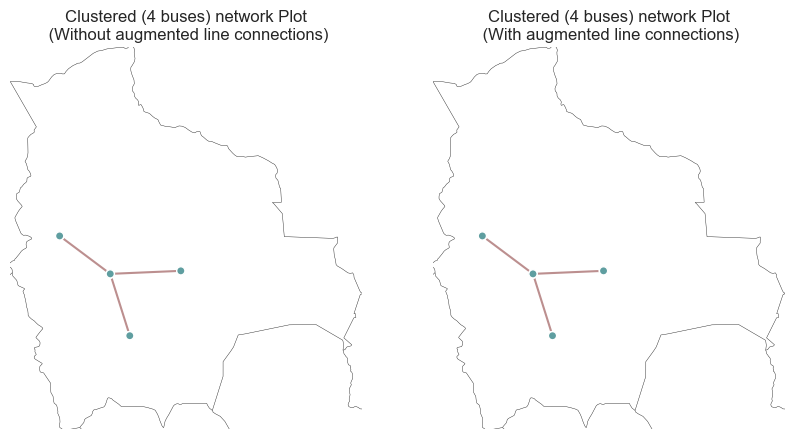

In [3]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

solved_4_network = os.getcwd() +  "/results/networks/elec_s_4_ec_lcopt_Co2L-3H.nc"
n_solve_4 = pypsa.Network(solved_4_network)

solved_4_network = os.getcwd() +  "/results/networks/elec_s_4_ec_lcopt_Co2L-3H_noline.nc"
n_solve_4_noline = pypsa.Network(solved_4_network)

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solve_4_noline.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_solve_4.plot(ax=ax2,margin=0.5)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# optionally, add titles to your subplots
ax2.set_title('Clustered (4 buses) network Plot\n (With augmented line connections)')
ax1.set_title('Clustered (4 buses) network Plot\n (Without augmented line connections)')

# show the subplots
plt.savefig('augmentedLine_comparison_5buses.png')
plt.show()

In [12]:
n_solve_4.objective

nan

# Nice graphs

### Clustering

INFO:pypsa.io:Imported network elec_s_4.nc has buses, carriers, generators, lines, loads, storage_units
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
INFO:pypsa.io:Imported network elec_s_10.nc has buses, carriers, generators, lines, loads, storage_units
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolo

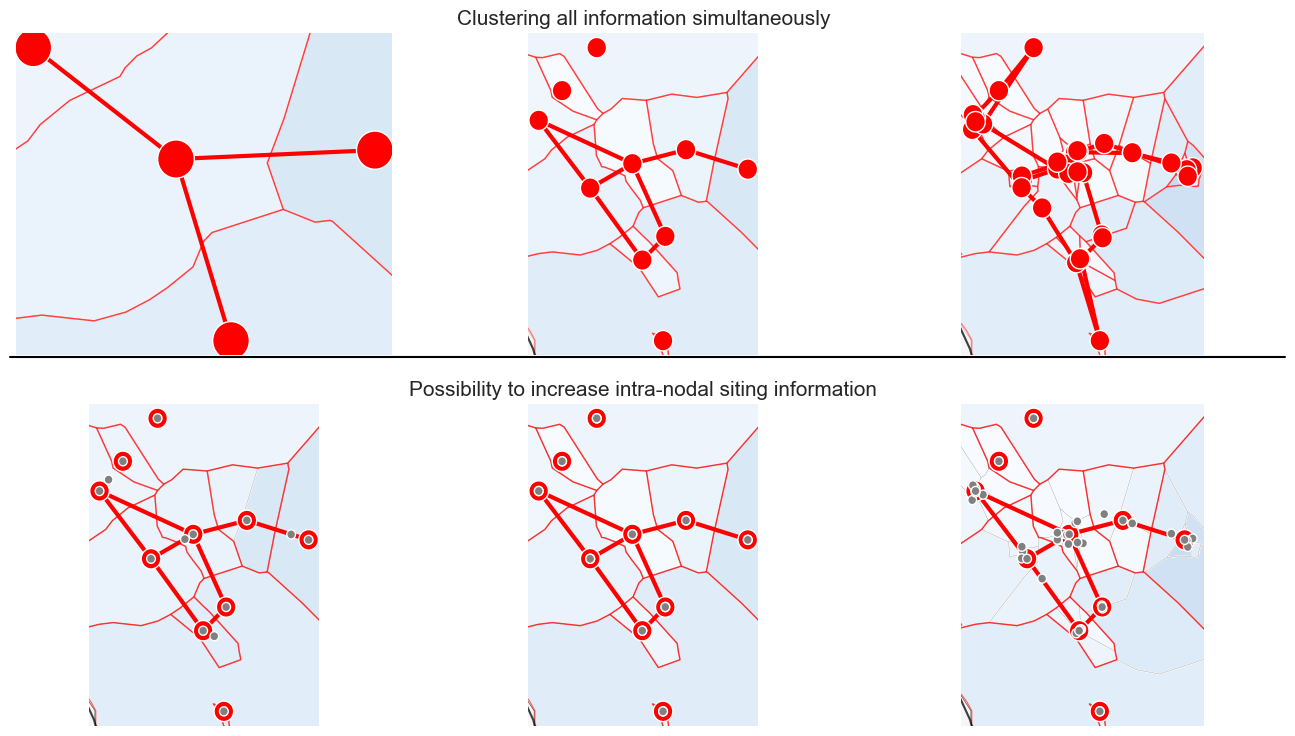

In [5]:
# customize your plot
resolutions = [4, 10, 37]  # must be 3 numbers, try to make three runs with different clusters
plot_capfacs = (
    "onwind"  # colors in the back represent capacity factors for this technology
)
cmap = "Blues"  # colormap for upper technology
red_linewidth = 3
red_bussizes = 5e-2

fig, axes = plt.subplots(
    2, 3, subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(17, 9)
)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0.15)

country=shapes

c = 0
for ax in axes[0, :]:
    n = pypsa.Network(f"networks/elec_s_{resolutions[c]}.nc")
    r = gpd.read_file(
        f"resources/bus_regions/regions_onshore_elec_s_{resolutions[c]}.geojson"
    ).set_index("name")
    factor = n.generators_t.p_max_pu.filter(like=plot_capfacs).mean()
    factor.index = [idx.split(f" {plot_capfacs}")[0] for idx in factor.index]
    r["factor"] = factor

    n.plot(
        color_geomap=True,
        bus_colors="red",
        bus_sizes=red_bussizes,
        line_colors="red",
        line_widths=red_linewidth,
        ax=ax,
    )
    r.boundary.plot(ax=ax, color="red", linewidth=1, alpha=0.5)
    r.plot(ax=ax, column="factor", cmap=cmap, alpha=1, vmin=0, vmax=1)
    country.boundary.plot(ax=ax, color="black", alpha=0.75)
    c += 1

c = 0
n = pypsa.Network(f"networks/elec_s_10.nc")
r = gpd.read_file(f"resources/bus_regions/regions_onshore_elec_s_10.geojson").set_index("name")
b = pd.read_csv("resources/bus_regions/busmap_elec_s_10.csv", index_col=0).squeeze("columns")

for ax in axes[1, :]:
    n2 = pypsa.Network(f"networks/elec_s_{resolutions[c]}.nc")
    r2 = gpd.read_file(
        f"resources/bus_regions/regions_onshore_elec_s_{resolutions[c]}.geojson"
    ).set_index("name")
    factor = n2.generators_t.p_max_pu.filter(like=plot_capfacs).mean()
    factor.index = [idx.split(f" {plot_capfacs}")[0] for idx in factor.index]
    r2["factor"] = factor

    b2 = pd.read_csv(
        f"resources/bus_regions/busmap_elec_s_{resolutions[c]}.csv", index_col=0
    ).squeeze("columns")
    n2.mremove("Line", n2.lines.index)

    debug = 0
    for nb in b.unique():
        nl = b2.loc[b[b == nb].index].unique()
        nb = n.buses.loc[nb]
        nb.name = nb.name + " ref"
        n2.madd("Bus", names=[nb.name], x=nb.x, y=nb.y)
        #n2.madd("Line", names=nl + f" ref line {debug}", bus0=[nb.name] * len(nl), bus1=nl)

        debug += 1

    n.plot(
        color_geomap=True,
        bus_colors="red",
        bus_sizes=red_bussizes,
        line_colors="red",
        line_widths=red_linewidth,
        ax=ax,
    )
    n2.plot(bus_colors="grey", bus_sizes=1e-2, line_colors="grey", ax=ax)
    r2.boundary.plot(ax=ax, color="grey", linewidth=0.25, alpha=0.5)
    r2.plot(ax=ax, column="factor", cmap=cmap, alpha=1, vmin=0, vmax=1)
    r.boundary.plot(ax=ax, color="red", linewidth=1, alpha=0.5)
    country.boundary.plot(ax=ax, color="black", alpha=0.75)

    c += 1

axes[0, 1].set_title(
    "Clustering all information simultaneously", fontsize=15
)  # , FontWeight = 'bold')
axes[1, 1].set_title(
    "Possibility to increase intra-nodal siting information", fontsize=15
)  # , FontWeight = 'bold')

# Draw a horizontal line
line = plt.Line2D([0.14, 0.89], [0.52, 0.52], transform=fig.transFigure, color="black")
fig.add_artist(line)

# plt.savefig("visualise_clustering.pdf", bbox_inches="tight")
plt.show()

/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


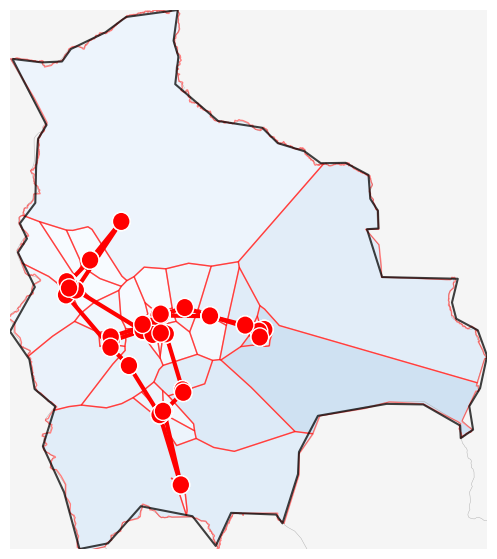

In [8]:
n=n_solve_37
c=37

fig, ax = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

r = gpd.read_file(
        f"resources/bus_regions/regions_onshore_elec_s_37.geojson"
    ).set_index("name")
factor = n.generators_t.p_max_pu.filter(like=plot_capfacs).mean()
factor.index = [idx.split(f" {plot_capfacs}")[0] for idx in factor.index]
r["factor"] = factor
    
n.plot(
        color_geomap=True,
        bus_colors="red",
        bus_sizes=red_bussizes,
        line_colors="red",
        line_widths=red_linewidth,
        ax=ax,
    )

r.boundary.plot(ax=ax, color="red", linewidth=1, alpha=0.5)
r.plot(ax=ax, column="factor", cmap=cmap, alpha=1, vmin=0, vmax=1)
country.boundary.plot(ax=ax, color="black", alpha=0.75)
ax.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

plt.show()

# Update of GitHub repository

A new version of the GitHub repository include the following changes in the config file:
- group_tolerance_buses: 5000 (before: 500)
group_tolerance_buses = Tolerance in meters of the close buses to merge
- "include_tyndp: true" removed

As a consequence, the limit of bus for the clustering is now 32, not 37 anymore.

In [5]:
base_network= os.getcwd() +  "/networks/base.nc"

n_base= pypsa.Network(base_network)

INFO:pypsa.io:Imported network base.nc has buses, lines, transformers


In [6]:
solved_32_network = os.getcwd() +  "/results/networks/elec_s_32_ec_lcopt_Co2L-3H.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_solve_32 = pypsa.Network(solved_32_network)

INFO:pypsa.io:Imported network elec_s_32_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [8]:
elec_network = os.getcwd() +  "/networks/elec.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_elec = pypsa.Network(elec_network)

INFO:pypsa.io:Imported network elec.nc has buses, carriers, generators, lines, loads, storage_units, transformers


(<matplotlib.collections.PatchCollection at 0x16ee9cf70>,
 <matplotlib.collections.LineCollection at 0x16ee62530>)

/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


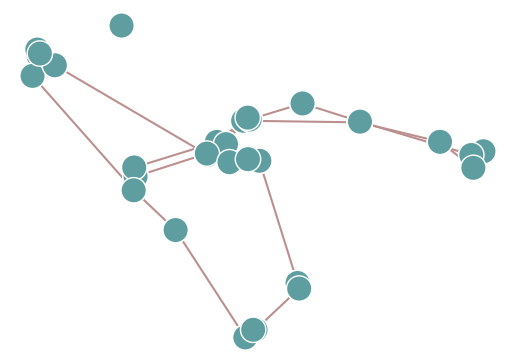

In [9]:
n_solve_32.plot()

INFO:pypsa.io:Imported network elec_s_5_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


(<matplotlib.collections.PatchCollection at 0x16f1135b0>,
 <matplotlib.collections.LineCollection at 0x16ebbd300>)

/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


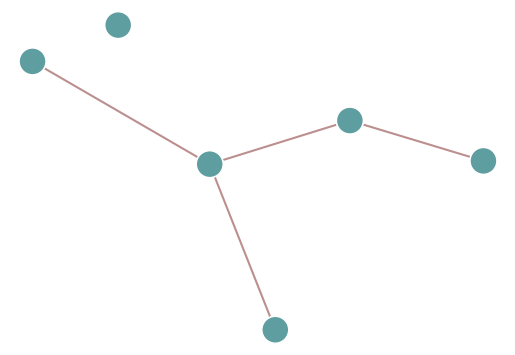

In [11]:
solved_5_network = os.getcwd() +  "/results/networks/elec_s_5_ec_lcopt_Co2L-3H.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_solve_5 = pypsa.Network(solved_5_network)

n_solve_5.plot()

INFO:pypsa.io:Imported network elec_s_5_ec_lcopt_Co2L-3H_noline.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


(<matplotlib.collections.PatchCollection at 0x16f307160>,
 <matplotlib.collections.LineCollection at 0x16f395f00>)

/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


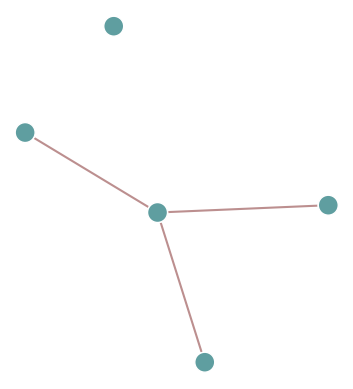

In [15]:
solved_5_network_old = os.getcwd() +  "/results/networks/results_old/elec_s_5_ec_lcopt_Co2L-3H_noline.nc"

#Se cargan los resultados de la optimizacion del problema segun las caracteristicas definidas para el modelo en n_solve con la funcion (operador?) Network de pypsa

n_solve_5_old = pypsa.Network(solved_5_network_old)

n_solve_5_old.plot()

/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


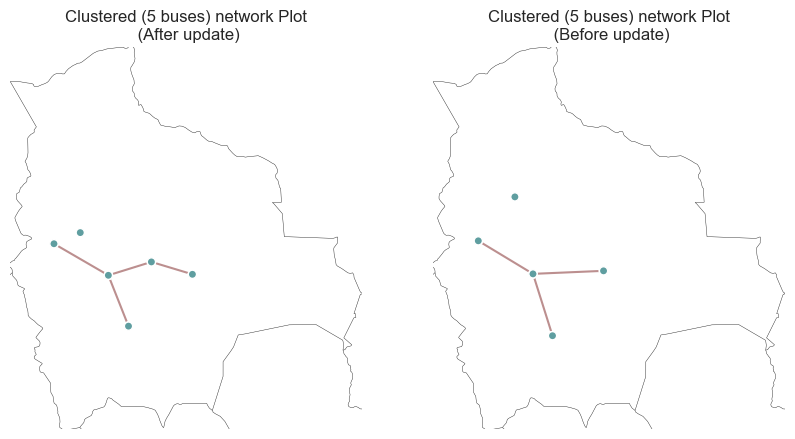

In [18]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solve_5.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_solve_5_old.plot(ax=ax2,margin=0.5)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# optionally, add titles to your subplots
ax1.set_title('Clustered (5 buses) network Plot\n (After update)')
ax2.set_title('Clustered (5 buses) network Plot\n (Before update)')

# show the subplots
#plt.savefig('augmentedLine_comparison_5buses.png')
plt.show()

In [16]:
solved_10_network = os.getcwd() +  "/results/networks/elec_s_10_ec_lcopt_Co2L-3H.nc"
n_solve_10 = pypsa.Network(solved_10_network)

solved_10_network_old = os.getcwd() +  "/results/networks/results_old/elec_s_10_ec_lcopt_Co2L-3H_noline.nc"
n_solve_10_old = pypsa.Network(solved_10_network_old)

INFO:pypsa.io:Imported network elec_s_10_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_10_ec_lcopt_Co2L-3H_noline.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


INFO:pypsa.io:Imported network elec_s_32_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_10_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_10_ec_lcopt_Co2L-3H_noline.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


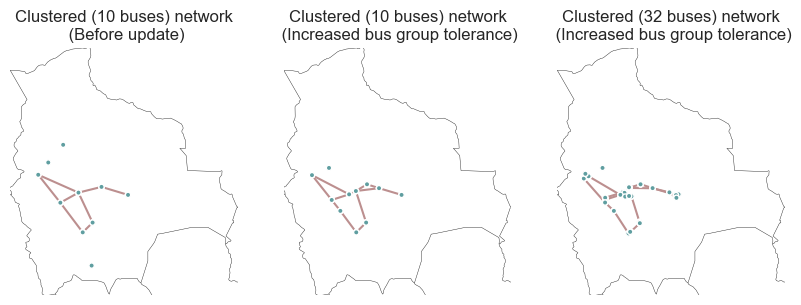

In [93]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

solved_32_network = os.getcwd() +  "/results/networks/elec_s_32_ec_lcopt_Co2L-3H.nc"
n_solve_32 = pypsa.Network(solved_32_network)

solved_10_network = os.getcwd() +  "/results/networks/elec_s_10_ec_lcopt_Co2L-3H.nc"
n_solve_10 = pypsa.Network(solved_10_network)

solved_10_network_old = os.getcwd() +  "/results/networks/results_old/elec_s_10_ec_lcopt_Co2L-3H_noline.nc"
n_solve_10_old = pypsa.Network(solved_10_network_old)

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solve_10_old.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

n_solve_10.plot(ax=ax2,margin=0.5)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

n_solve_32.plot(ax=ax3,margin=0.5)
ax3.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# optionally, add titles to your subplots

ax1.set_title('Clustered (10 buses) network\n (Before update)')
ax2.set_title('Clustered (10 buses) network\n (Increased bus group tolerance)')
ax3.set_title('Clustered (32 buses) network\n (Increased bus group tolerance)')

# show the subplots
plt.savefig('update_comparison_10_32.png')
plt.show()

INFO:pypsa.io:Imported network elec_s_20_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_20_ec_lcopt_Co2L-3H_noline.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


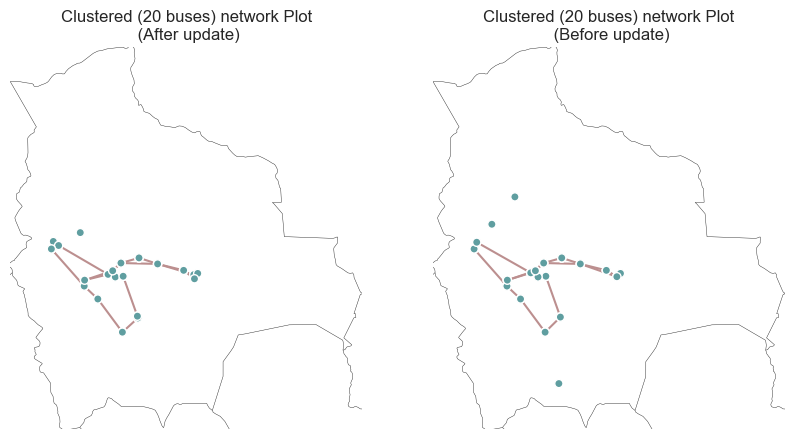

In [92]:
solved_20_network = os.getcwd() +  "/results/networks/elec_s_20_ec_lcopt_Co2L-3H.nc"
n_solve_20 = pypsa.Network(solved_20_network)

solved_20_network_old = os.getcwd() +  "/results/networks/results_old/elec_s_20_ec_lcopt_Co2L-3H_noline.nc"
n_solve_20_old = pypsa.Network(solved_20_network_old)

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solve_20.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_solve_20_old.plot(ax=ax2,margin=0.5)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# optionally, add titles to your subplots
ax1.set_title('Clustered (20 buses) network Plot\n (After update)')
ax2.set_title('Clustered (20 buses) network Plot\n (Before update)')

# show the subplots
plt.savefig('comparison_update_10bus.png')
plt.show()

INFO:pypsa.io:Imported network elec_s_20_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_35_ec_lcopt_Co2L-3H_noline.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


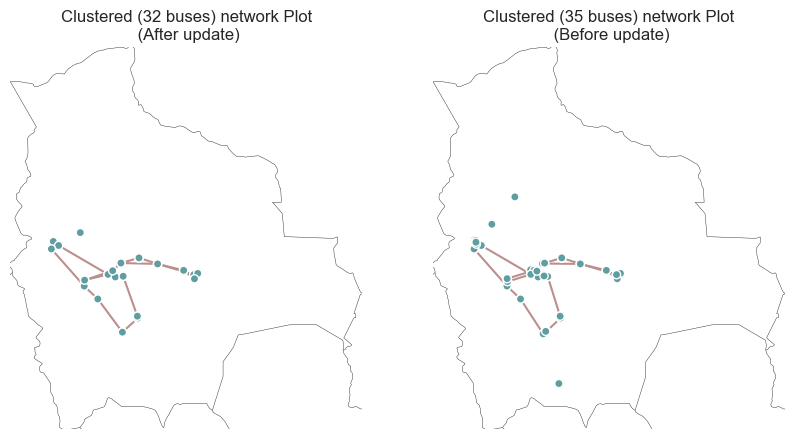

In [26]:
solved_32_network = os.getcwd() +  "/results/networks/elec_s_32_ec_lcopt_Co2L-3H.nc"
n_solve_32 = pypsa.Network(solved_32_network)

solved_37_network_old = os.getcwd() +  "/results/networks/results_old/elec_s_35_ec_lcopt_Co2L-3H_noline.nc"
n_solve_37_old = pypsa.Network(solved_37_network_old)

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solve_32.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_solve_35_old.plot(ax=ax2,margin=0.5)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# optionally, add titles to your subplots
ax1.set_title('Clustered (32 buses) network Plot\n (After update)')
ax2.set_title('Clustered (35 buses) network Plot\n (Before update)')

# show the subplots
#plt.savefig('augmentedLine_comparison_5buses.png')
plt.show()

INFO:pypsa.io:Imported network elec_s_7_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


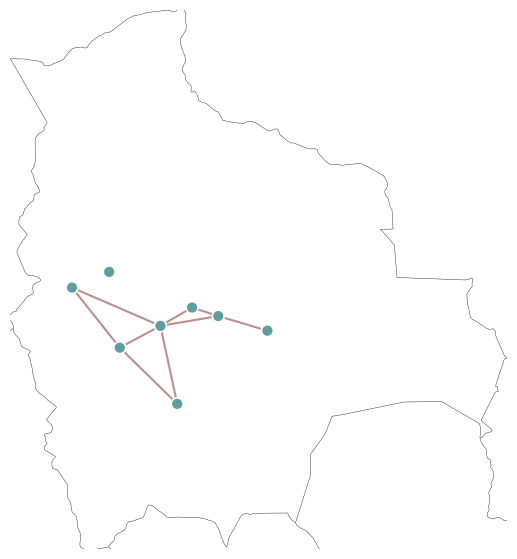

In [28]:
solved_7_network = os.getcwd() +  "/results/networks/elec_s_7_ec_lcopt_Co2L-3H.nc"
n_solve_7 = pypsa.Network(solved_7_network)

fig, ax1 = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n_solve_7.plot(ax=ax1)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


INFO:pypsa.io:Imported network elec_s_7_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


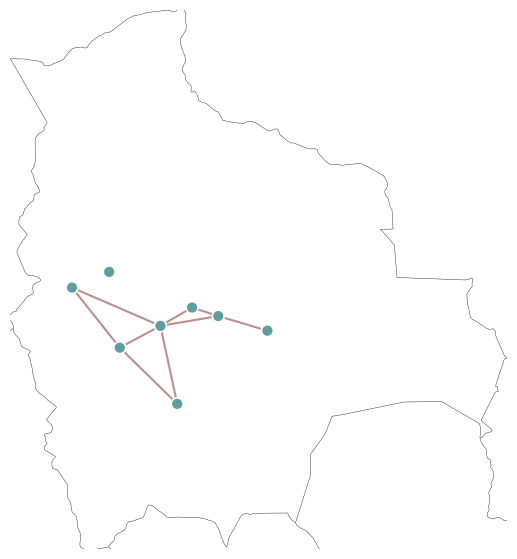

In [30]:
solved_7_network = os.getcwd() +  "/results/networks/elec_s_7_ec_lcopt_Co2L-3H.nc"
n_solve_7 = pypsa.Network(solved_7_network)

fig, ax1 = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n_solve_7.plot(ax=ax1)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


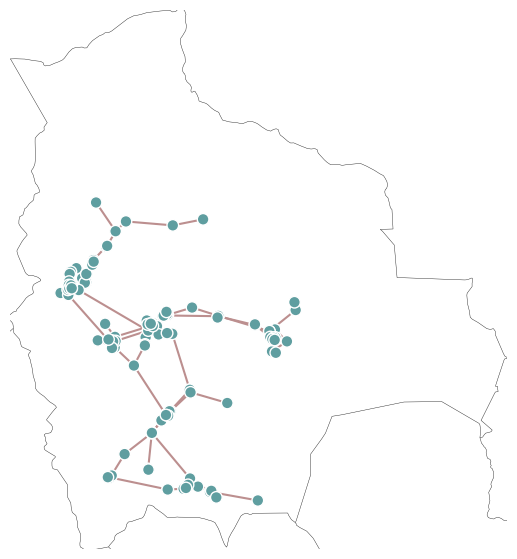

In [27]:
fig, ax1 = plt.subplots(figsize=(7, 7),subplot_kw={'projection': ccrs.PlateCarree()})

n_base.plot(ax=ax1)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


INFO:pypsa.io:Imported network elec_s_32.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_32_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


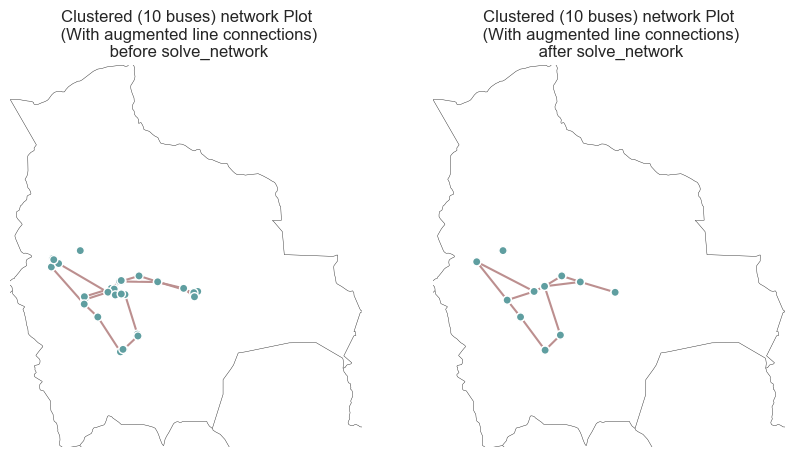

In [34]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

cluster_network = os.getcwd() +  "/networks/elec_s_32.nc"
n_cluster = pypsa.Network(cluster_network)

solved_10_network = os.getcwd() +  "/results/networks/elec_s_32_ec_lcopt_Co2L-3H.nc"
n_solve_1O = pypsa.Network(solved_10_network)

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_cluster.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_solve_10.plot(ax=ax2,margin=0.5)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# optionally, add titles to your subplots
ax1.set_title('Clustered (10 buses) network Plot\n (With augmented line connections)\n before solve_network')

ax2.set_title('Clustered (10 buses) network Plot\n (With augmented line connections)\n after solve_network')

# show the subplots
plt.savefig('effectofsolving_comparison.png')
plt.show()

INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-3H_noline.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_5_ec_lcopt_Co2L-3H_noline.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_37_ec_lcopt_Co2L-3H_noline.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


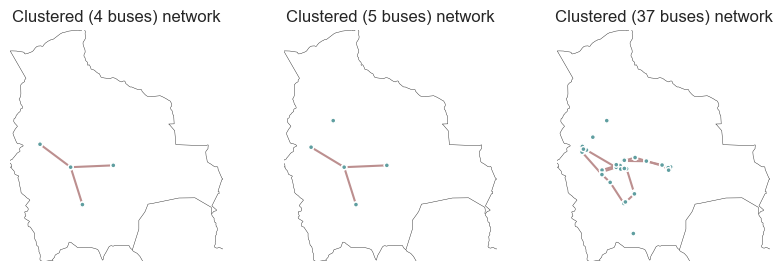

In [56]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

solved_4_network = os.getcwd() +  "/results/networks/results_old/elec_s_4_ec_lcopt_Co2L-3H_noline.nc"
n_solve_4 = pypsa.Network(solved_4_network)

solved_5_network = os.getcwd() +  "/results/networks/results_old/elec_s_5_ec_lcopt_Co2L-3H_noline.nc"
n_solve_5 = pypsa.Network(solved_5_network)

solved_37_network = os.getcwd() +  "/results/networks/results_old/elec_s_37_ec_lcopt_Co2L-3H_noline.nc"
n_solve_37 = pypsa.Network(solved_37_network)

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solve_4.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
n_solve_5.plot(ax=ax2)
ax2.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

n_solve_37.plot(ax=ax3)
ax3.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


# optionally, add titles to your subplots
ax1.set_title('Clustered (4 buses) network')
ax2.set_title('Clustered (5 buses) network')
ax3.set_title('Clustered (37 buses) network')


# show the subplots
plt.savefig('clustered_comparison.png')
plt.show()

INFO:pypsa.io:Imported network elec_s_4_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_5_ec_lcopt_Co2L-3H_noline.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_37_ec_lcopt_Co2L-3H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/opt/anaconda3/envs/pypsa-earth/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


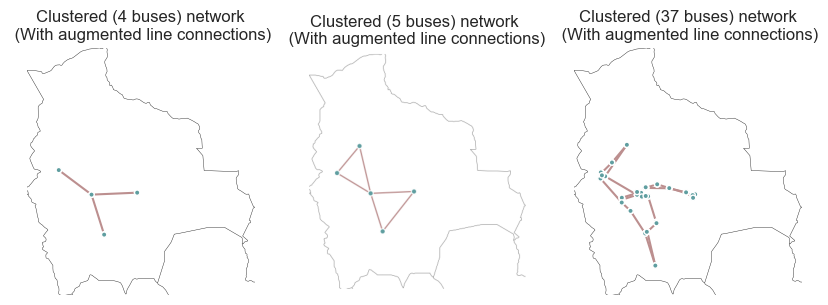

In [83]:
import matplotlib.pyplot as plt
import pypsa
import numpy as np
import cartopy.crs as ccrs

solved_4_network = os.getcwd() +  "/results/networks/results_old/elec_s_4_ec_lcopt_Co2L-3H.nc"
n_solve_4 = pypsa.Network(solved_4_network)

solved_5_network = os.getcwd() +  "/results/networks/results_old/elec_s_5_ec_lcopt_Co2L-3H_noline.nc"
n_solve_5 = pypsa.Network(solved_5_network)

solved_37_network = os.getcwd() +  "/results/networks/results_old/elec_s_37_ec_lcopt_Co2L-3H.nc"
n_solve_37 = pypsa.Network(solved_37_network)

#determine the limits of the country
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
shapes=world[world.name.isin(["Bolivia"])].set_index("name")

# create a subplot with 1 row and 2 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4),subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot your network in the first subplot
n_solve_4.plot(ax=ax1,margin=0.5)
ax1.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())

# hide the background map
#ax1.background_patch.set_visible(False)

# show an image in the second subplot
img = plt.imread(os.getcwd() +  "/augmented_line_5buses.png")
extent = (0, img.shape[1]*0.1, 0, img.shape[0]*0.1) # left, right, bottom, top
ax2.imshow(img, extent=extent)


n_solve_37.plot(ax=ax3)
ax3.set_extent([shapes.total_bounds[0], shapes.total_bounds[2],shapes.total_bounds[1], shapes.total_bounds[3]], crs=ccrs.PlateCarree())


# optionally, add titles to your subplots
ax1.set_title('Clustered (4 buses) network\n (With augmented line connections)')
ax2.set_title('Clustered (5 buses) network\n (With augmented line connections)')
ax3.set_title('Clustered (37 buses) network\n (With augmented line connections)')


# show the subplots
plt.savefig('clustered_comparison_augline_title.png')
plt.show()